# Simple Linear Regression: Predicting CO2 Emissions
This notebook demonstrates how to implement **Simple Linear Regression** using Scikit-Learn to predict CO2 emissions based on engine size.

## About the Author
This notebook was created by **Aimal Khan**.

### Step 1: Import Required Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Step 2: Load Dataset and Inspect Data

In [ ]:
# Load dataset
file_path = '../datasets/CO2-emissions.csv'
df = pd.read_csv(file_path)

🔹 First 5 rows of the dataset:
    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                           

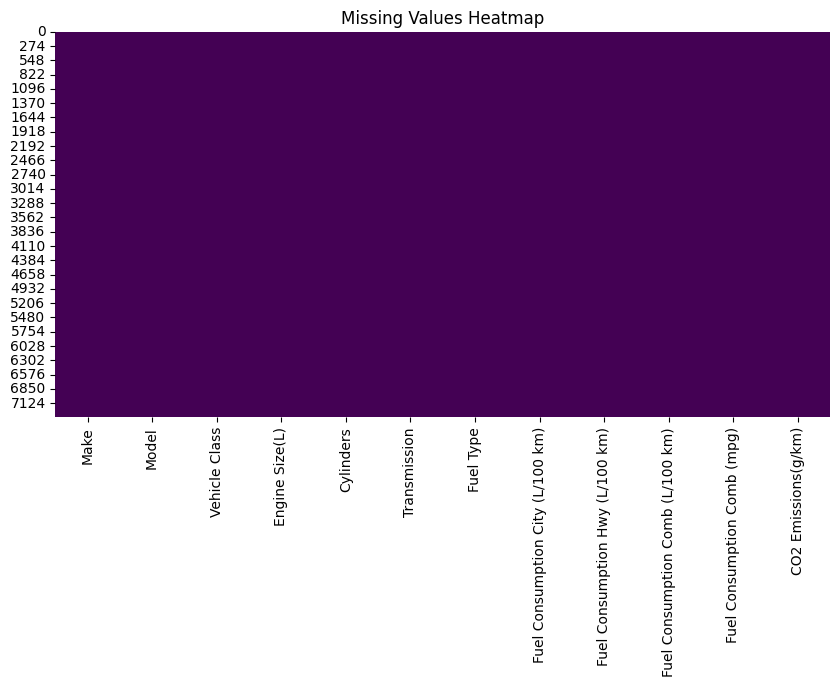

In [42]:
# 1️⃣ Display first and last rows
print("🔹 First 5 rows of the dataset:")
print(df.head())

print("\n🔹 Last 5 rows of the dataset:")
print(df.tail())

# 2️⃣ Get dataset summary
print("\n🔹 Dataset Information:")
print(df.info())

# 3️⃣ Get basic statistics (numerical features)
print("\n🔹 Statistical Summary:")
print(df.describe())

# 4️⃣ Check for missing values
print("\n🔹 Missing Values in Dataset:")
print(df.isnull().sum())

# 5️⃣ Check for duplicate rows
print("\n🔹 Number of Duplicate Rows:")
print(df.duplicated().sum())

# 6️⃣ Get column names and data types
print("\n🔹 Column Names and Data Types:")
print(df.dtypes)

# 7️⃣ Count unique values in each column
print("\n🔹 Unique Value Counts:")
print(df.nunique())

# 8️⃣ Check correlation between numerical features
print("\n🔹 Feature Correlation Matrix:")
# print(df.corr())

# 9️⃣ Get value counts for categorical columns (replace 'Column_Name' with actual categorical column)
categorical_columns = ['Make', 'Model', 'Vehicle Class', 'Fuel Type']  # Adjust based on your dataset
for col in categorical_columns:
    print(f"\n🔹 Value Counts for {col}:")
    print(df[col].value_counts())

# 1️⃣0️⃣ Visualizing Missing Values (if any)
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


In [43]:
# 1️⃣ Remove Duplicate Rows
df = df.drop_duplicates()

# 2️⃣ Rename Columns: Convert to lowercase, replace spaces with underscores, and remove brackets
df.columns = df.columns.str.lower().str.replace(" ", "_").str.replace(r"\(.*?\)", "", regex=True)

# 3️⃣ Handle Missing Values (If any)
df = df.dropna()  # Remove rows with missing values (or use df.fillna(value) for imputation)

# 4️⃣ Convert Categorical Columns to Lowercase (If applicable)
categorical_columns = ['make', 'model', 'vehicle_class', 'fuel_type']  # Adjust based on your dataset
for col in categorical_columns:
    df[col] = df[col].astype(str).str.lower()

# 5️⃣ Convert Numerical Data Types (If required)
numerical_columns = ['engine_size', 'cylinders', 'fuel_consumption_hwy_', 'co2_emissions']  # Adjust based on dataset
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# 6️⃣ Reset Index after cleaning
df = df.reset_index(drop=True)

# 7️⃣ Verify Data After Preprocessing
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6282 entries, 0 to 6281
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   make                    6282 non-null   object 
 1   model                   6282 non-null   object 
 2   vehicle_class           6282 non-null   object 
 3   engine_size             6282 non-null   float64
 4   cylinders               6282 non-null   int64  
 5   transmission            6282 non-null   object 
 6   fuel_type               6282 non-null   object 
 7   fuel_consumption_city_  6282 non-null   float64
 8   fuel_consumption_hwy_   6282 non-null   float64
 9   fuel_consumption_comb_  6282 non-null   float64
 10  fuel_consumption_comb_  6282 non-null   int64  
 11  co2_emissions           6282 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 589.1+ KB


(None,
     make       model vehicle_class  engine_size  cylinders transmission  \
 0  acura         ilx       compact          2.0          4          AS5   
 1  acura         ilx       compact          2.4          4           M6   
 2  acura  ilx hybrid       compact          1.5          4          AV7   
 3  acura     mdx 4wd   suv - small          3.5          6          AS6   
 4  acura     rdx awd   suv - small          3.5          6          AS6   
 
   fuel_type  fuel_consumption_city_  fuel_consumption_hwy_  \
 0         z                     9.9                    6.7   
 1         z                    11.2                    7.7   
 2         z                     6.0                    5.8   
 3         z                    12.7                    9.1   
 4         z                    12.1                    8.7   
 
    fuel_consumption_comb_  fuel_consumption_comb_  co2_emissions  
 0                     8.5                      33            196  
 1                 

### Step 3: Select Features and Target Variable
We will use **Engine Size (L)** as the independent variable and **CO2 Emissions (g/km)** as the dependent variable.

In [44]:
# Select features and target variable
X = df[['engine_size']].values  # Independent variable
Y = df[['co2_emissions']].values  # Dependent variable

# Check for missing values
df[['engine_size', 'co2_emissions']].isnull().sum()

engine_size      0
co2_emissions    0
dtype: int64

### Step 4: Split Dataset into Training and Testing Sets
We will use **80% of the data for training** and **20% for testing**.

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Step 5: Feature Scaling (Optional but Recommended)

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 6: Train the Simple Linear Regression Model

In [47]:
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

LinearRegression()

### Step 7: Model Evaluation

In [48]:
# Predictions
Y_pred = model.predict(X_test_scaled)

# Model performance metrics
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Optimized Coefficients (Slope, b1): {model.coef_[0][0]:.4f}')
print(f'Optimized Intercept (b0): {model.intercept_[0]:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-Squared Score (R²): {r2:.4f}')

Optimized Coefficients (Slope, b1): 50.4927
Optimized Intercept (b0): 250.8062
Mean Squared Error (MSE): 968.3280
R-Squared Score (R²): 0.7317


### Step 8: Visualizing the Regression Line

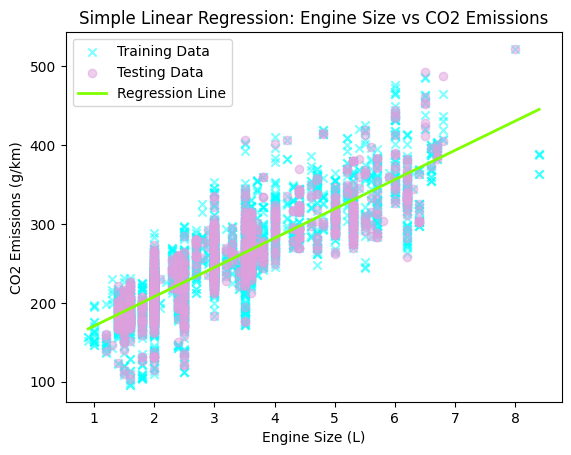

In [49]:
# Reverse scaling for visualization
X_train_original = scaler.inverse_transform(X_train_scaled)
X_test_original = scaler.inverse_transform(X_test_scaled)

# Plot training and testing data
plt.scatter(X_train_original, Y_train, color='cyan', label='Training Data', marker='x', alpha=0.5)
plt.scatter(X_test_original, Y_test, color='plum', label='Testing Data', marker='o', alpha=0.5)

# Regression line
X_line = np.linspace(X_train_original.min(), X_train_original.max(), 100).reshape(-1, 1)
X_line_scaled = scaler.transform(X_line)
Y_line = model.predict(X_line_scaled)

plt.plot(X_line, Y_line, color='chartreuse', linewidth=2, label='Regression Line')

# Labels and title
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('Simple Linear Regression: Engine Size vs CO2 Emissions')
plt.legend()
plt.show()